In [1]:
import pandas as pd
import seaborn as sns
import datetime
import warnings
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
df = pd.read_csv('crude_rate.csv')


In [3]:
df = df.replace('Suppressed', 0)

In [4]:
# convert the obj to numeric
df['Deaths'] = pd.to_numeric(df['Deaths'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 8 columns):
State                                                              816 non-null object
Year                                                               816 non-null int64
Deaths                                                             816 non-null int64
Population                                                         816 non-null int64
Crude Rate                                                         816 non-null object
Crude Rate Lower 95% Confidence Interval                           816 non-null object
Crude Rate Upper 95% Confidence Interval                           816 non-null object
Prescriptions Dispensed by US Retailers in that year (millions)    816 non-null int64
dtypes: int64(4), object(4)
memory usage: 51.1+ KB


In [6]:
# Functions
# def subseting (df ,state):
#     df_copy = df.copy()
#     df_copy= df[df.State == state]
#     df_copy = pd.to_numeric(df['Deaths'])
#     df_copy = df[[ 'Year' , 'Deaths']]
#     return df_copy

def convert_to_dt(row):
    dt = datetime.datetime(row.Year, 1, 1)
    return dt

def convert_to_dt1(df):
    df_copy = df.copy()
    df_copy.Year = df_copy.apply(convert_to_dt , axis =1)
    return df_copy

In [7]:
def subseting (df ,state):
    df_copy = df.copy()
    df = df[df.State == state]
    df_copy = df[[ 'Year' , 'Deaths']]
    df = pd.to_numeric(df['Deaths'])
    return df_copy

In [8]:
list_of_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']

## Subseting df by State

In [9]:
df_Alabama = subseting(df , list_of_states[0])

In [10]:
df_Alabama

,Year,Deaths
0,1999,39
1,2000,46
2,2001,67
3,2002,75
4,2003,54
5,2004,92
6,2005,83
7,2006,134
8,2007,172
9,2008,195


In [11]:
df_Alaska = subseting(df, list_of_states[1])

In [12]:
df_Arizona = subseting(df , list_of_states[2])

In [13]:
df_Arkansas = subseting(df , list_of_states[3])

In [14]:
df_California = subseting (df , list_of_states[4])

In [15]:
df_Colorado = subseting(df , list_of_states[5])

In [16]:
df_Connecticut = subseting (df , list_of_states[6])

In [17]:
df_Delaware = subseting(df , list_of_states[7])

In [18]:
df_DSC = subseting(df , list_of_states[8])

In [19]:
df_DSC

,Year,Deaths
128,1999,28
129,2000,43
130,2001,48
131,2002,29
132,2003,60
133,2004,53
134,2005,45
135,2006,62
136,2007,29
137,2008,33


In [20]:
df_Florida = subseting(df ,list_of_states[9])

In [21]:
df_Georgia = subseting(df , list_of_states[10])

In [22]:
df_Hawaii = subseting(df , list_of_states[11])

In [23]:
df_Idaho = subseting(df , list_of_states[12])

In [24]:
df_Illinois = subseting (df , list_of_states[13])

In [25]:
df_Indiana = subseting(df , list_of_states[14])

In [26]:
df_Iowa = subseting(df , list_of_states[15])

In [27]:
df_Kansas = subseting(df , list_of_states[16])

In [28]:
df_Kentucky = subseting(df , list_of_states[17])

In [29]:
df_Louisiana = subseting(df , list_of_states[18])

In [30]:
df_Maine = subseting(df , list_of_states[19])

In [31]:
df_Maryland = subseting(df , list_of_states[20])

In [32]:
df_Massachusetts = subseting(df , list_of_states[21])

In [33]:
df_Michigan = subseting(df , list_of_states[22])

In [34]:
df_Minnesota = subseting(df , list_of_states[23])

In [35]:
df_Mississippi = subseting(df , list_of_states[24])

In [36]:
df_Missouri = subseting(df , list_of_states[25])

In [37]:
df_Montana = subseting(df , list_of_states[26])

In [38]:
df_Nebraska = subseting(df , list_of_states[27])

In [39]:
df_Nevada = subseting(df , list_of_states [28])

In [40]:
df_New_Hampshire = subseting(df , list_of_states [29])

In [41]:
df_New_Jersey = subseting(df , list_of_states [30])

In [42]:
df_New_Mexico = subseting(df , list_of_states [31])

In [43]:
df_NY = subseting(df , list_of_states [32])

In [44]:
df_North_Carolina = subseting(df , list_of_states [33])

In [45]:
df_North_Dakota = subseting(df , list_of_states [34])

In [46]:
df_Ohio = subseting(df , list_of_states [35])

In [47]:
df_Oklahoma = subseting(df , list_of_states [36])

In [48]:
df_Oregon = subseting(df , list_of_states [37])

In [49]:
df_Pennsylvania = subseting(df , list_of_states [38])

In [50]:
df_Rhode_Island = subseting(df , list_of_states [39])

In [51]:
df_South_Carolina = subseting(df , list_of_states [40])

In [52]:
df_South_Dakota = subseting(df , list_of_states [41])

In [53]:
df_Tennessee = subseting(df , list_of_states [42])

In [54]:
df_Texas = subseting(df , list_of_states [43])

In [55]:
df_Utah = subseting(df , list_of_states [44])

In [56]:
df_Vermot = subseting(df , list_of_states [45])

In [57]:
df_Virginia = subseting(df , list_of_states [46])

In [58]:
df_Washington = subseting(df , list_of_states [47])

In [59]:
df_West_Virginia = subseting(df , list_of_states [48])

In [60]:
df_Wisconsin = subseting(df , list_of_states [49])

In [61]:
df_Wyoming = subseting(df , list_of_states [50])

## Converting Year in datetime obj

In [62]:
# df_Alabama.Year = df_Alabama.apply(convert_to_dt, axis=1)
df_Alabama.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 2 columns):
Year      16 non-null int64
Deaths    16 non-null int64
dtypes: int64(2)
memory usage: 384.0 bytes


In [66]:
# df_Arizona.Year = df_Arizona.apply(convert_to_dt , axis =1)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [63]:
df_Alabama = convert_to_dt1(df_Alabama)

In [64]:
df_Alabama

,Year,Deaths
0,1999-01-01,39
1,2000-01-01,46
2,2001-01-01,67
3,2002-01-01,75
4,2003-01-01,54
5,2004-01-01,92
6,2005-01-01,83
7,2006-01-01,134
8,2007-01-01,172
9,2008-01-01,195


In [65]:
df_Arizona = convert_to_dt1(df_Arizona)

In [66]:
df_Arizona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 32 to 47
Data columns (total 2 columns):
Year      16 non-null datetime64[ns]
Deaths    16 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 384.0 bytes


In [67]:
df_Arkansas = convert_to_dt1(df_Arkansas)

In [68]:
df_California = convert_to_dt1(df_California)

In [69]:
df_Colorado = convert_to_dt1(df_Colorado)

In [70]:
df_Connecticut= convert_to_dt1(df_Connecticut)

In [71]:
df_Delaware = convert_to_dt1(df_Delaware)

In [72]:
df_DSC = convert_to_dt1(df_DSC)

In [73]:
df_Florida = convert_to_dt1(df_Florida)

In [74]:
df_Georgia = convert_to_dt1(df_Georgia)

In [75]:
df_Hawaii = convert_to_dt1(df_Hawaii)

In [76]:
df_Idaho = convert_to_dt1(df_Idaho)

In [77]:
df_Illinois = convert_to_dt1(df_Illinois)

In [78]:
df_Indiana = convert_to_dt1(df_Indiana)

In [79]:
df_Iowa = convert_to_dt1(df_Iowa)

In [80]:
df_Kansas = convert_to_dt1(df_Kansas)

In [81]:
df_Kentucky = convert_to_dt1(df_Kentucky)

In [82]:
df_Louisiana = convert_to_dt1(df_Louisiana)


In [83]:
df_Maine = convert_to_dt1(df_Maine)


In [84]:
df_Maryland = convert_to_dt1(df_Maryland)

In [85]:
df_Massachusetts = convert_to_dt1(df_Massachusetts)

In [86]:
df_Michigan = convert_to_dt1(df_Michigan)

In [87]:
df_Minnesota = convert_to_dt1(df_Minnesota)

In [88]:
df_Mississippi = convert_to_dt1(df_Mississippi)

In [89]:
df_Missouri = convert_to_dt1(df_Missouri)

In [90]:
df_Montana = convert_to_dt1(df_Montana)

In [91]:
df_Nebraska = convert_to_dt1(df_Nebraska)

In [92]:
df_Nevada = convert_to_dt1(df_Nevada)

In [93]:
df_New_Hampshire = convert_to_dt1(df_New_Hampshire)

In [94]:
df_New_Jersey = convert_to_dt1(df_New_Jersey)

In [95]:
df_New_Mexico = convert_to_dt1(df_New_Mexico)

In [96]:
df_North_Carolina = convert_to_dt1(df_North_Carolina)

In [97]:
df_North_Dakota = convert_to_dt1(df_North_Dakota)

In [98]:
df_NY  = convert_to_dt1(df_NY)

In [99]:
df_Ohio = convert_to_dt1(df_Ohio)

In [100]:
df_Oklahoma = convert_to_dt1(df_Oklahoma)

In [101]:
df_Oregon = convert_to_dt1(df_Oregon)

In [102]:
df_Pennsylvania = convert_to_dt1(df_Pennsylvania)

In [103]:
df_Rhode_Island = convert_to_dt1(df_Rhode_Island)

In [104]:
df_South_Carolina = convert_to_dt1(df_South_Carolina)

In [105]:
df_South_Dakota = convert_to_dt1(df_South_Dakota)

In [106]:
df_Tennessee = convert_to_dt1(df_Tennessee)

In [107]:
df_Texas = convert_to_dt1(df_Texas)

In [108]:
df_Utah = convert_to_dt1(df_Utah)

In [109]:
df_Vermot = convert_to_dt1(df_Vermot)


In [110]:
df_Virginia = convert_to_dt1(df_Virginia)

In [111]:
df_Washington = convert_to_dt1(df_Washington)

In [112]:
df_West_Virginia = convert_to_dt1(df_West_Virginia)

In [113]:
df_Wisconsin = convert_to_dt1(df_Wisconsin)

In [114]:
df_Wyoming = convert_to_dt1(df_Wyoming)


In [115]:
df_Wyoming

,Year,Deaths
800,1999-01-01,0
801,2000-01-01,10
802,2001-01-01,0
803,2002-01-01,17
804,2003-01-01,0
805,2004-01-01,14
806,2005-01-01,10
807,2006-01-01,14
808,2007-01-01,25
809,2008-01-01,48


## Plot to see Stationarity

<Figure size 432x288 with 0 Axes>

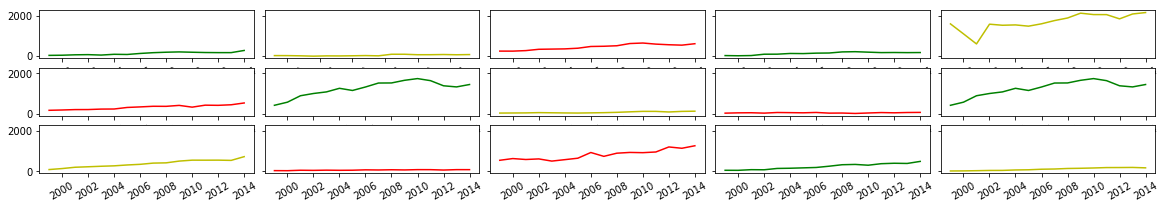

In [152]:
fig=plt.figure()
fig,((ax,ax2,ax3, ax4 ,ax5) , (ax6,ax7,ax8, ax9 ,ax10) , (ax11,ax12,ax13, ax14 ,ax15 )) = plt.subplots(3,5,sharey=True , figsize=(10,10))
fig.subplots_adjust(wspace=0.05)
fig.set_size_inches(20, 3, forward=True)

ax.plot(df_Alabama['Year'],df_Alabama['Deaths'],label='Deaths',color='g')
ax2.plot(df_Alaska['Year'],df_Alaska['Deaths'],label='Deaths',color='y')
ax3.plot(df_Arizona['Year'],df_Arizona['Deaths'],label='Deaths',color='r')
ax4.plot(df_Arkansas['Year'],df_Arkansas['Deaths'],label='Deaths',color='g')
ax5.plot(df_California['Year'],df_California['Deaths'],label='Deaths',color='y')
ax6.plot(df_Colorado['Year'],df_Colorado['Deaths'],label='Deaths',color='r')
ax7.plot(df_Connecticut['Year'],df_Florida['Deaths'],label='Deaths',color='g')
ax8.plot(df_Delaware['Year'],df_Delaware['Deaths'],label='Deaths',color='y')
ax9.plot(df_DSC['Year'],df_DSC['Deaths'],label='Deaths',color='r')
ax10.plot(df_Florida['Year'],df_Florida['Deaths'],label='Deaths',color='g')
ax11.plot(df_Georgia['Year'],df_Georgia['Deaths'],label='Georgia',color='y')
ax12.plot(df_Idaho['Year'],df_Idaho['Deaths'],label='Deaths',color='r')
ax13.plot(df_Illinois['Year'],df_Illinois['Deaths'],label='Deaths',color='r')
ax14.plot(df_Indiana['Year'],df_Indiana['Deaths'],label='Deaths',color='g')
ax15.plot(df_Iowa['Year'],df_Iowa['Deaths'],label='Deaths',color='y')


# ax.set_xlim(healthyde['timestamp'].iloc[0], healthyde['timestamp'].iloc[-1] )
# ax2.set_xlim(healthynde['timestamp'].iloc[0], healthynde['timestamp'].iloc[-1] )
# ax3.set_xlim(healthylde['timestamp'].iloc[0], healthylde['timestamp'].iloc[-1] )

labels = ax.get_xticklabels()
for label in labels:
    label.set_rotation(30)

labels = ax2.get_xticklabels()
for label in labels:
    label.set_rotation(30)

labels = ax3.get_xticklabels()
for label in labels:
    label.set_rotation(30)
    
labels = ax4.get_xticklabels()
for label in labels:
    label.set_rotation(30)

labels = ax5.get_xticklabels()
for label in labels:
    label.set_rotation(30)
    
labels = ax6.get_xticklabels()
for label in labels:
    label.set_rotation(30)
    
labels = ax7.get_xticklabels()
for label in labels:
    label.set_rotation(30)
       
labels = ax8.get_xticklabels()
for label in labels:
    label.set_rotation(30)

labels = ax9.get_xticklabels()
for label in labels:
    label.set_rotation(30)


labels = ax10.get_xticklabels()
for label in labels:
    label.set_rotation(30)
    
labels = ax11.get_xticklabels()
for label in labels:
    label.set_rotation(30)

labels = ax12.get_xticklabels()
for label in labels:
    label.set_rotation(30)

labels = ax13.get_xticklabels()
for label in labels:
    label.set_rotation(30)
    
labels = ax14.get_xticklabels()
for label in labels:
    label.set_rotation(30)

labels = ax15.get_xticklabels()
for label in labels:
    label.set_rotation(30)   
    
# ax.legend()
# ax2.legend()
# ax3.legend()
# ax4.legend()
# ax5.legend()
# ax6.legend()
# ax7.legend()
# ax8.legend()
# ax9.legend()
# ax10.legend()

plt.show()


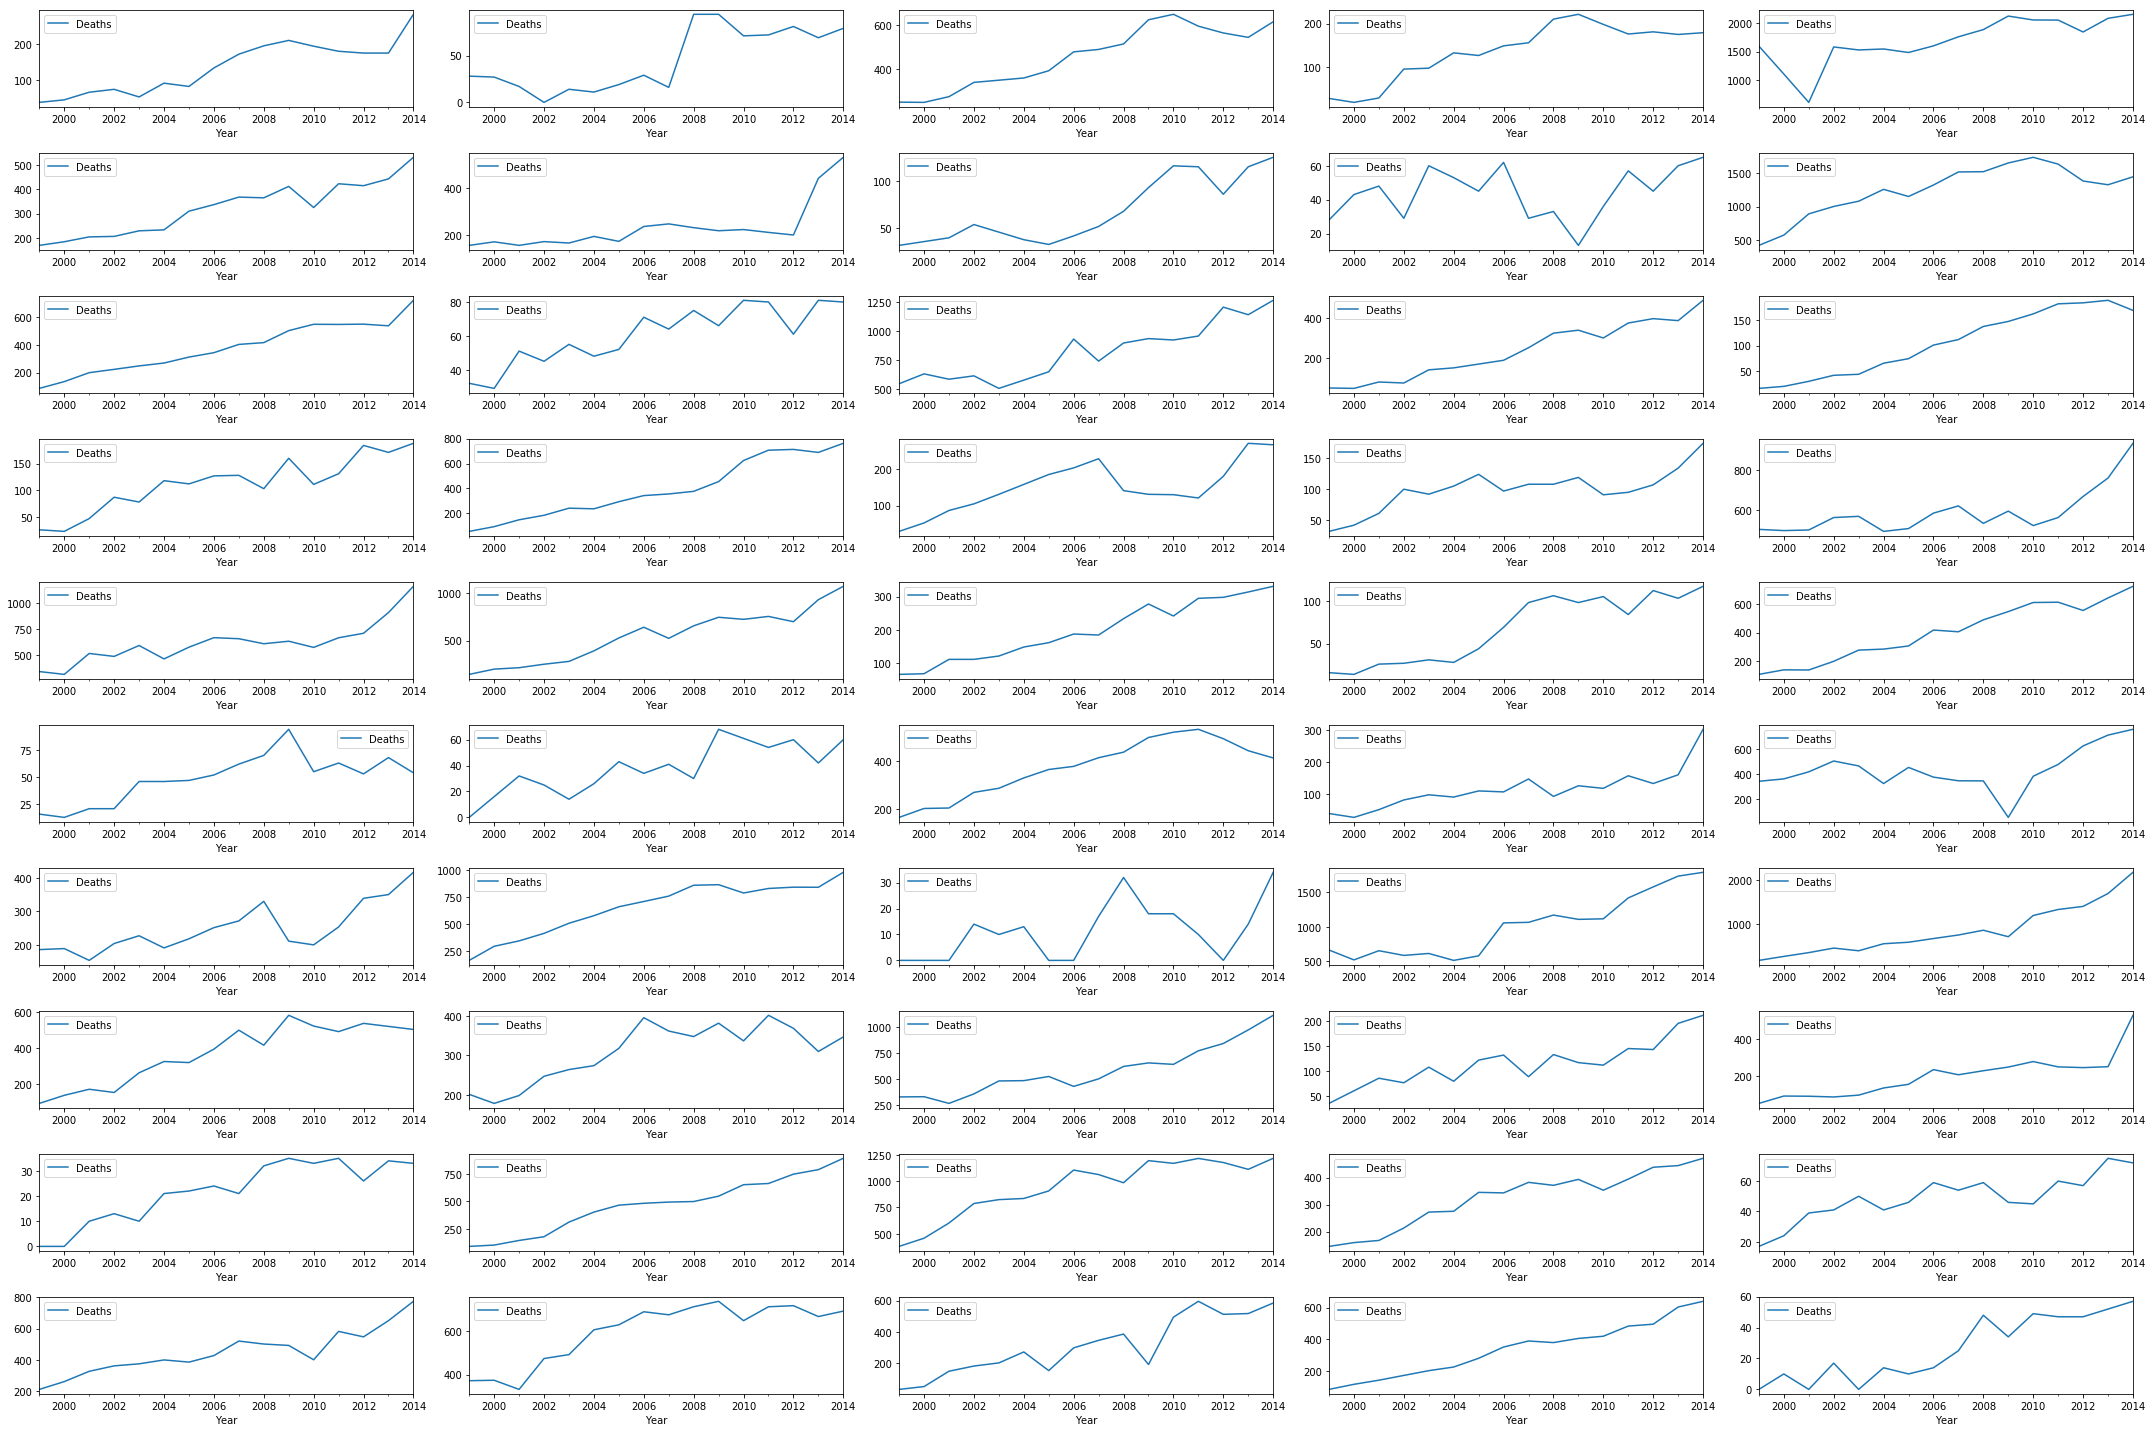

In [116]:
# Make the graph 20 inches by 40 inches
plt.figure(figsize=(30,20), facecolor='white')

# plot numbering starts at 1, not 0
list_of_df = [df_Alabama, df_Alaska, df_Arizona, df_Arkansas, df_California, df_Colorado, df_Connecticut,df_Delaware, df_DSC, df_Florida, df_Georgia,df_Idaho,
             df_Illinois, df_Indiana , df_Iowa, df_Kansas, df_Kentucky , df_Louisiana , df_Maine ,df_Maryland ,df_Massachusetts,
             df_Michigan, df_Minnesota, df_Mississippi ,df_Missouri,df_Montana , df_Nebraska , df_Nevada, df_New_Hampshire ,
             df_New_Jersey , df_New_Mexico , df_North_Carolina , df_North_Dakota , df_NY ,df_Ohio , df_Oklahoma , df_Oregon, df_Pennsylvania ,df_Rhode_Island, df_South_Carolina,
             df_South_Dakota , df_Tennessee , df_Texas , df_Utah ,df_Vermot , df_Virginia , df_Washington , df_West_Virginia ,
             df_Wisconsin , df_Wyoming]

plot_number = 1
for i in list_of_df:
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(10, 5, plot_number)
    i.plot(x='Year', y='Deaths', ax=ax)
#     ax.set_title(list_of_df)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

## Transformation, Smoothing, and Differencing 


#### Based on Dickey-Fuller test, because p = < 0.05, we fail to reject the null hypothesis (that the time series is not stationary) at the p = 0.05 level, thus concluding that the time series is stationary.

In [118]:
def dickey_fuller(list_of_dfs):
    for i in list_of_dfs:
        X = i["Deaths"].values
        result = adfuller(X)
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

In [116]:
list_of_df = [df_Alabama, df_Alaska, df_Arizona, df_Arkansas, df_California, df_Colorado, df_Connecticut,df_Delaware, df_DSC, df_Florida, df_Georgia,df_Idaho,
             df_Illinois, df_Indiana , df_Iowa, df_Kansas, df_Kentucky , df_Louisiana , df_Maine ,df_Maryland ,df_Massachusetts,
             df_Michigan, df_Minnesota, df_Mississippi ,df_Missouri,df_Montana , df_Nebraska , df_Nevada, df_New_Hampshire ,
             df_New_Jersey , df_New_Mexico , df_North_Carolina , df_North_Dakota , df_NY ,df_Ohio , df_Oklahoma , df_Oregon, df_Pennsylvania ,df_Rhode_Island, df_South_Carolina,
             df_South_Dakota , df_Tennessee , df_Texas , df_Utah ,df_Vermot , df_Virginia , df_Washington , df_West_Virginia ,
             df_Wisconsin , df_Wyoming]

In [121]:
dickey_fuller(list_of_df)

ADF Statistic: 0.249449
p-value: 0.974903
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: -0.970722
p-value: 0.763792
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: -1.189738
p-value: 0.677994
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: 0.000000
p-value: 0.9

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [126]:
# def log_trasnformation(list_dfs):
#     for i in list_dfs:
#         i["Deaths"] = np.log(i["Deaths"]).diff()
        

In [117]:
def log_trans (list_dfs):
    for i in list_dfs:
        i["Deaths"] = np.log(i["Deaths"])
        i['Deaths'] = i['Deaths'].diff()

In [118]:
log_trans(list_of_df)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [127]:
# log_trasnformation(list_of_df)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


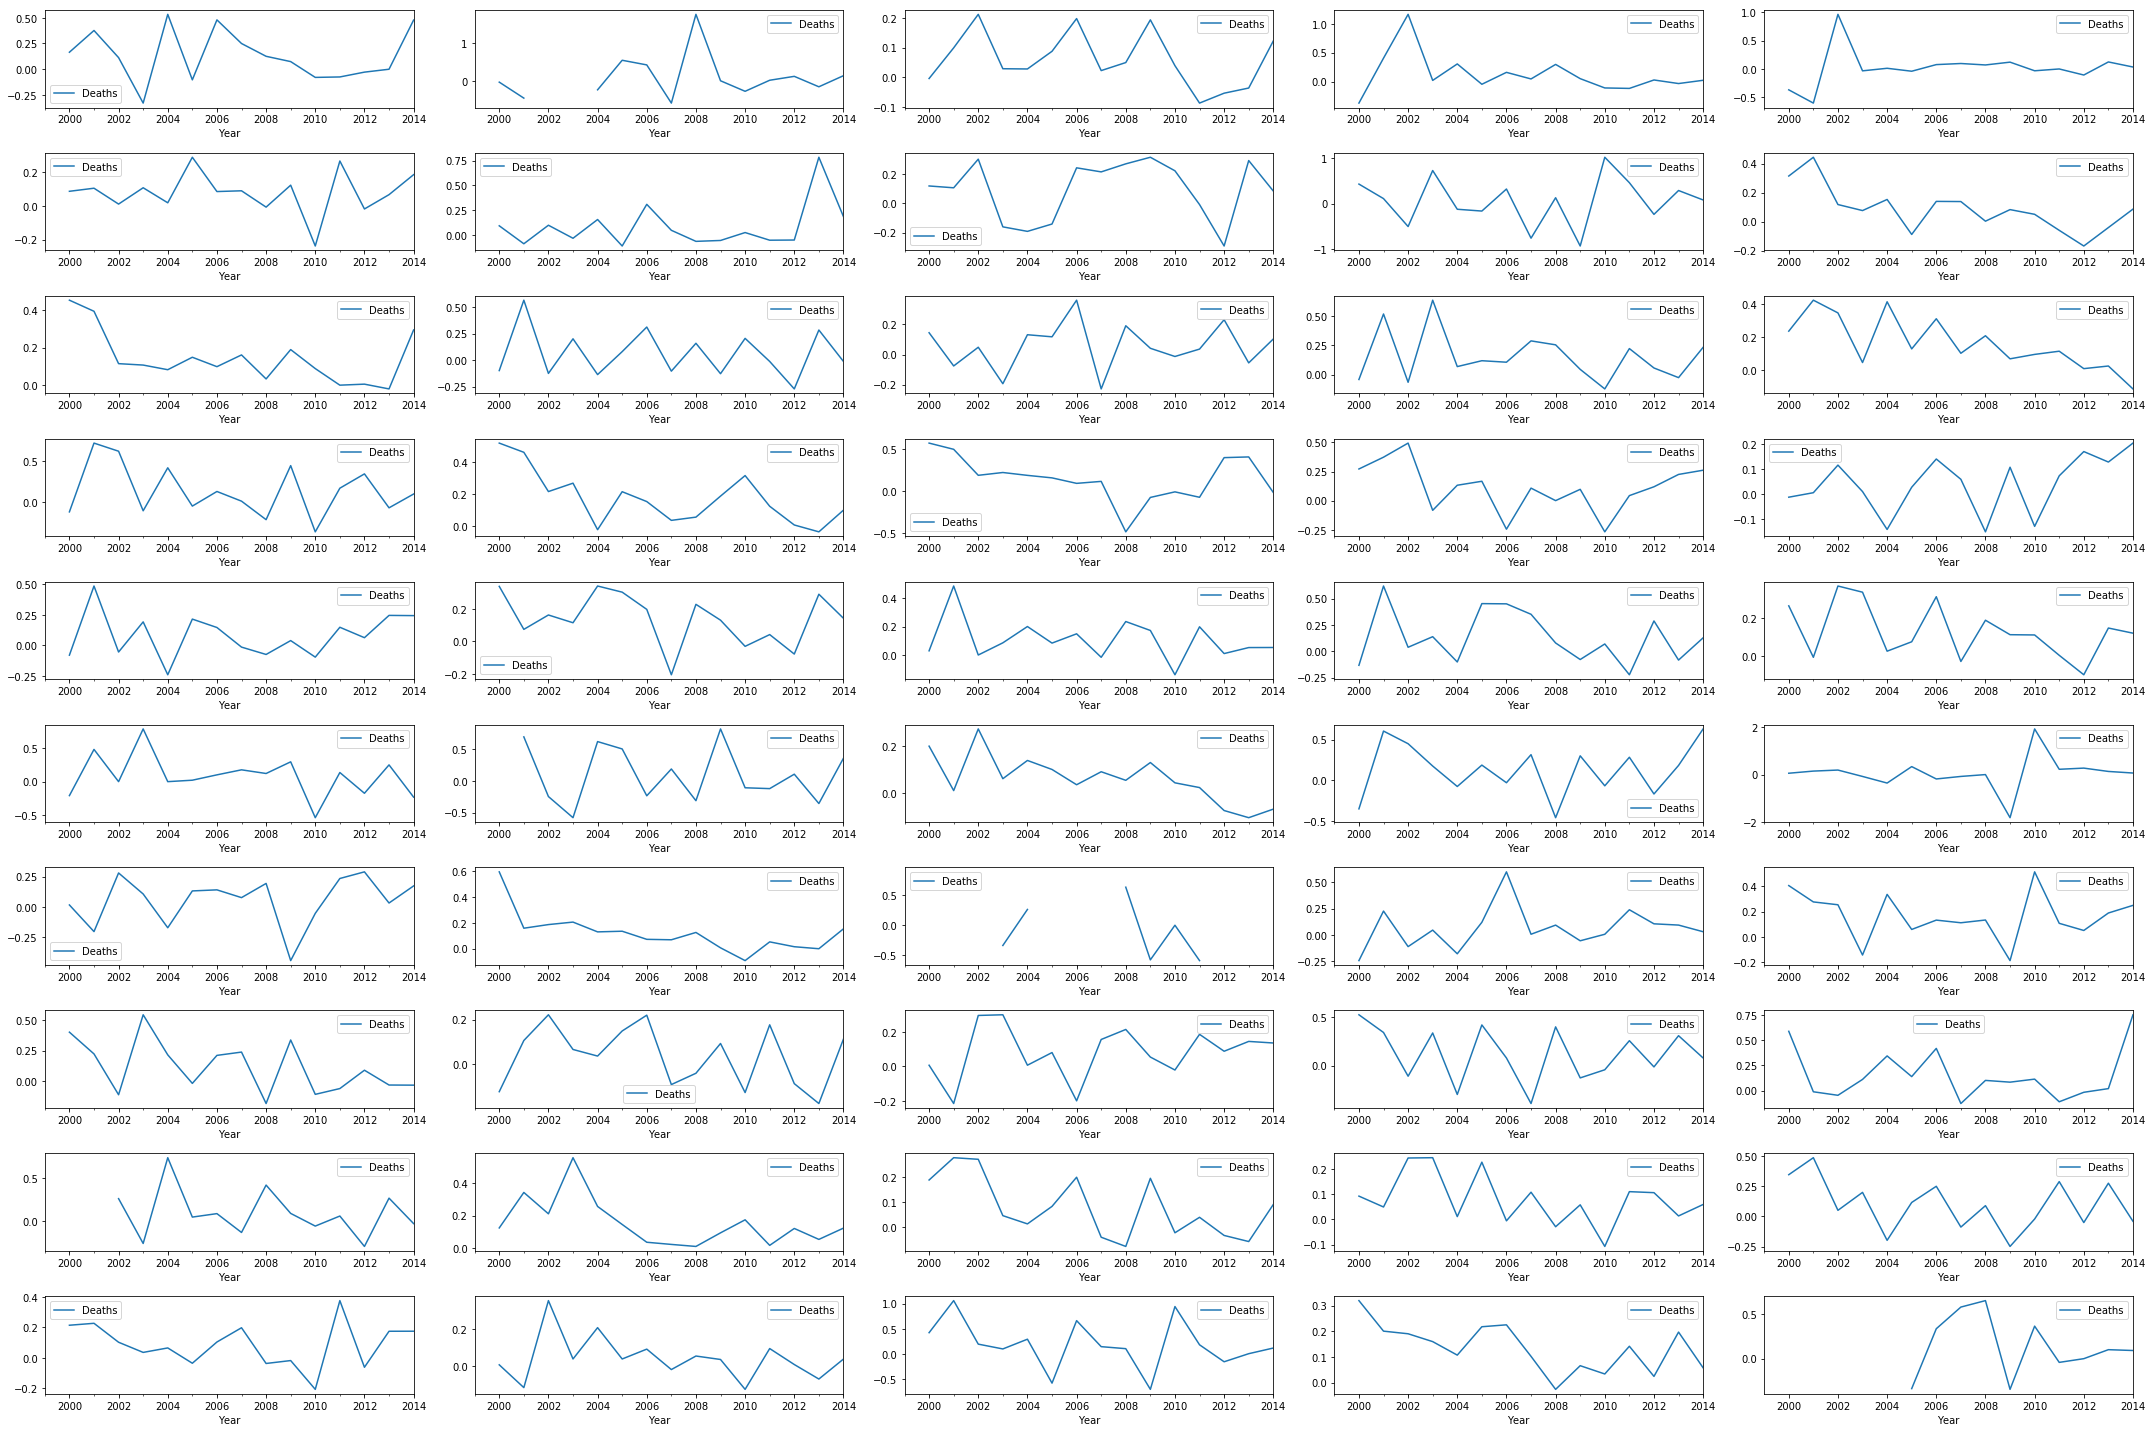

In [115]:
# graph show that some of the df have inf , -inf and NA values

# Make the graph 20 inches by 40 inches
plt.figure(figsize=(30,20), facecolor='white')

# plot numbering starts at 1, not 0
list_of_df = [df_Alabama, df_Alaska, df_Arizona, df_Arkansas, df_California, df_Colorado, df_Connecticut,df_Delaware, df_DSC, df_Florida, df_Georgia,df_Idaho,
             df_Illinois, df_Indiana , df_Iowa, df_Kansas, df_Kentucky , df_Louisiana , df_Maine ,df_Maryland ,df_Massachusetts,
             df_Michigan, df_Minnesota, df_Mississippi ,df_Missouri,df_Montana , df_Nebraska , df_Nevada, df_New_Hampshire ,
             df_New_Jersey , df_New_Mexico , df_North_Carolina , df_North_Dakota , df_NY ,df_Ohio , df_Oklahoma , df_Oregon, df_Pennsylvania ,df_Rhode_Island, df_South_Carolina,
             df_South_Dakota , df_Tennessee , df_Texas , df_Utah ,df_Vermot , df_Virginia , df_Washington , df_West_Virginia ,
             df_Wisconsin , df_Wyoming]
plot_number = 1
for i in list_of_df:
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(10, 5, plot_number)
    i.plot(x='Year', y='Deaths', ax=ax)
#     ax.set_title(i)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

In [119]:
def clean_na (df):
    df_copy = df.copy()
    df_copy["Deaths"] = df_copy["Deaths"].replace([np.inf, -np.inf], np.nan).dropna()
    return df_copy

# def clean_na (df):
#     df_copy = df.copy()
#     df_copy["Deaths"] = df_copy["Deaths"].replace([np.inf, -np.inf], np.nan).dropna()
#     return df_copy

def clean_na55 (df):
    df_copy = df.copy()
    df_copy["Deaths"] = df["Deaths"].replace([np.inf, -np.inf], np.nan)
    df_copy = df["Deaths"].dropna()
    return df_copy

# def clean_88 (df):
#     df["Deaths"] = df["Deaths"].replace([np.inf, -np.inf], np.nan).dropna(inplace = True)
#     return df
    
# def clean_na33 (df):
#     df_copy = df.copy()
#     df_copy["Deaths_clean"] = df_copy["Deaths"].replace([np.inf, -np.inf], np.nan).dropna()
#     return df_copy

# def clean_na2 (list_of_dfs):
#     dfs = []
#     for df in list_of_dfs: 
#         df = df["Deaths"].replace([np.inf, -np.inf], np.nan).dropna(inplace=True)
#         dfs.append(df)
#     return dfs


# def clean_na1(df):
#     df_copy = df.copy()
#     df_copy.Deaths = df_copy.mapapply(clean_na2 , axis =1)
#     return df_copy

In [146]:
clean_na55(df_Alabama)

1     0.165080
2     0.376051
3     0.112795
4    -0.328504
5     0.532805
6    -0.102948
7     0.478999
8     0.249655
9     0.125505
10    0.074108
11   -0.079249
12   -0.074901
13   -0.028171
14    0.000000
15    0.477121
Name: Deaths, dtype: float64

In [124]:
clean_list = [clean_na55(df) for df in list_of_df]

In [125]:
clean_list

[1     0.165080
 2     0.376051
 3     0.112795
 4    -0.328504
 5     0.532805
 6    -0.102948
 7     0.478999
 8     0.249655
 9     0.125505
 10    0.074108
 11   -0.079249
 12   -0.074901
 13   -0.028171
 14    0.000000
 15    0.477121
 Name: Deaths, dtype: float64, 17   -0.036368
 18   -0.462624
 19        -inf
 20         inf
 21   -0.241162
 22    0.546544
 23    0.422857
 24   -0.594707
 25    1.770706
 26    0.000000
 27   -0.280615
 28    0.013986
 29    0.117783
 30   -0.160343
 31    0.135341
 Name: Deaths, dtype: float64, 33   -0.004008
 34    0.099318
 35    0.212175
 36    0.028988
 37    0.028171
 38    0.087706
 39    0.197891
 40    0.022705
 41    0.049762
 42    0.193585
 43    0.039221
 44   -0.086732
 45   -0.053415
 46   -0.036040
 47    0.122461
 Name: Deaths, dtype: float64, 49   -0.371564
 50    0.405465
 51    1.163151
 52    0.020619
 53    0.305382
 54   -0.046162
 55    0.159759
 56    0.045910
 57    0.297252
 58    0.051055
 59   -0.109896
 60   -0.11778

In [120]:
new_list = [clean_na(df).dropna() for df in list_of_df]

In [121]:
new_list[1]

,Year,Deaths
17,2000,-0.036368
18,2001,-0.462624
21,2004,-0.241162
22,2005,0.546544
23,2006,0.422857
24,2007,-0.594707
25,2008,1.770706
26,2009,0.000000
27,2010,-0.280615
28,2011,0.013986


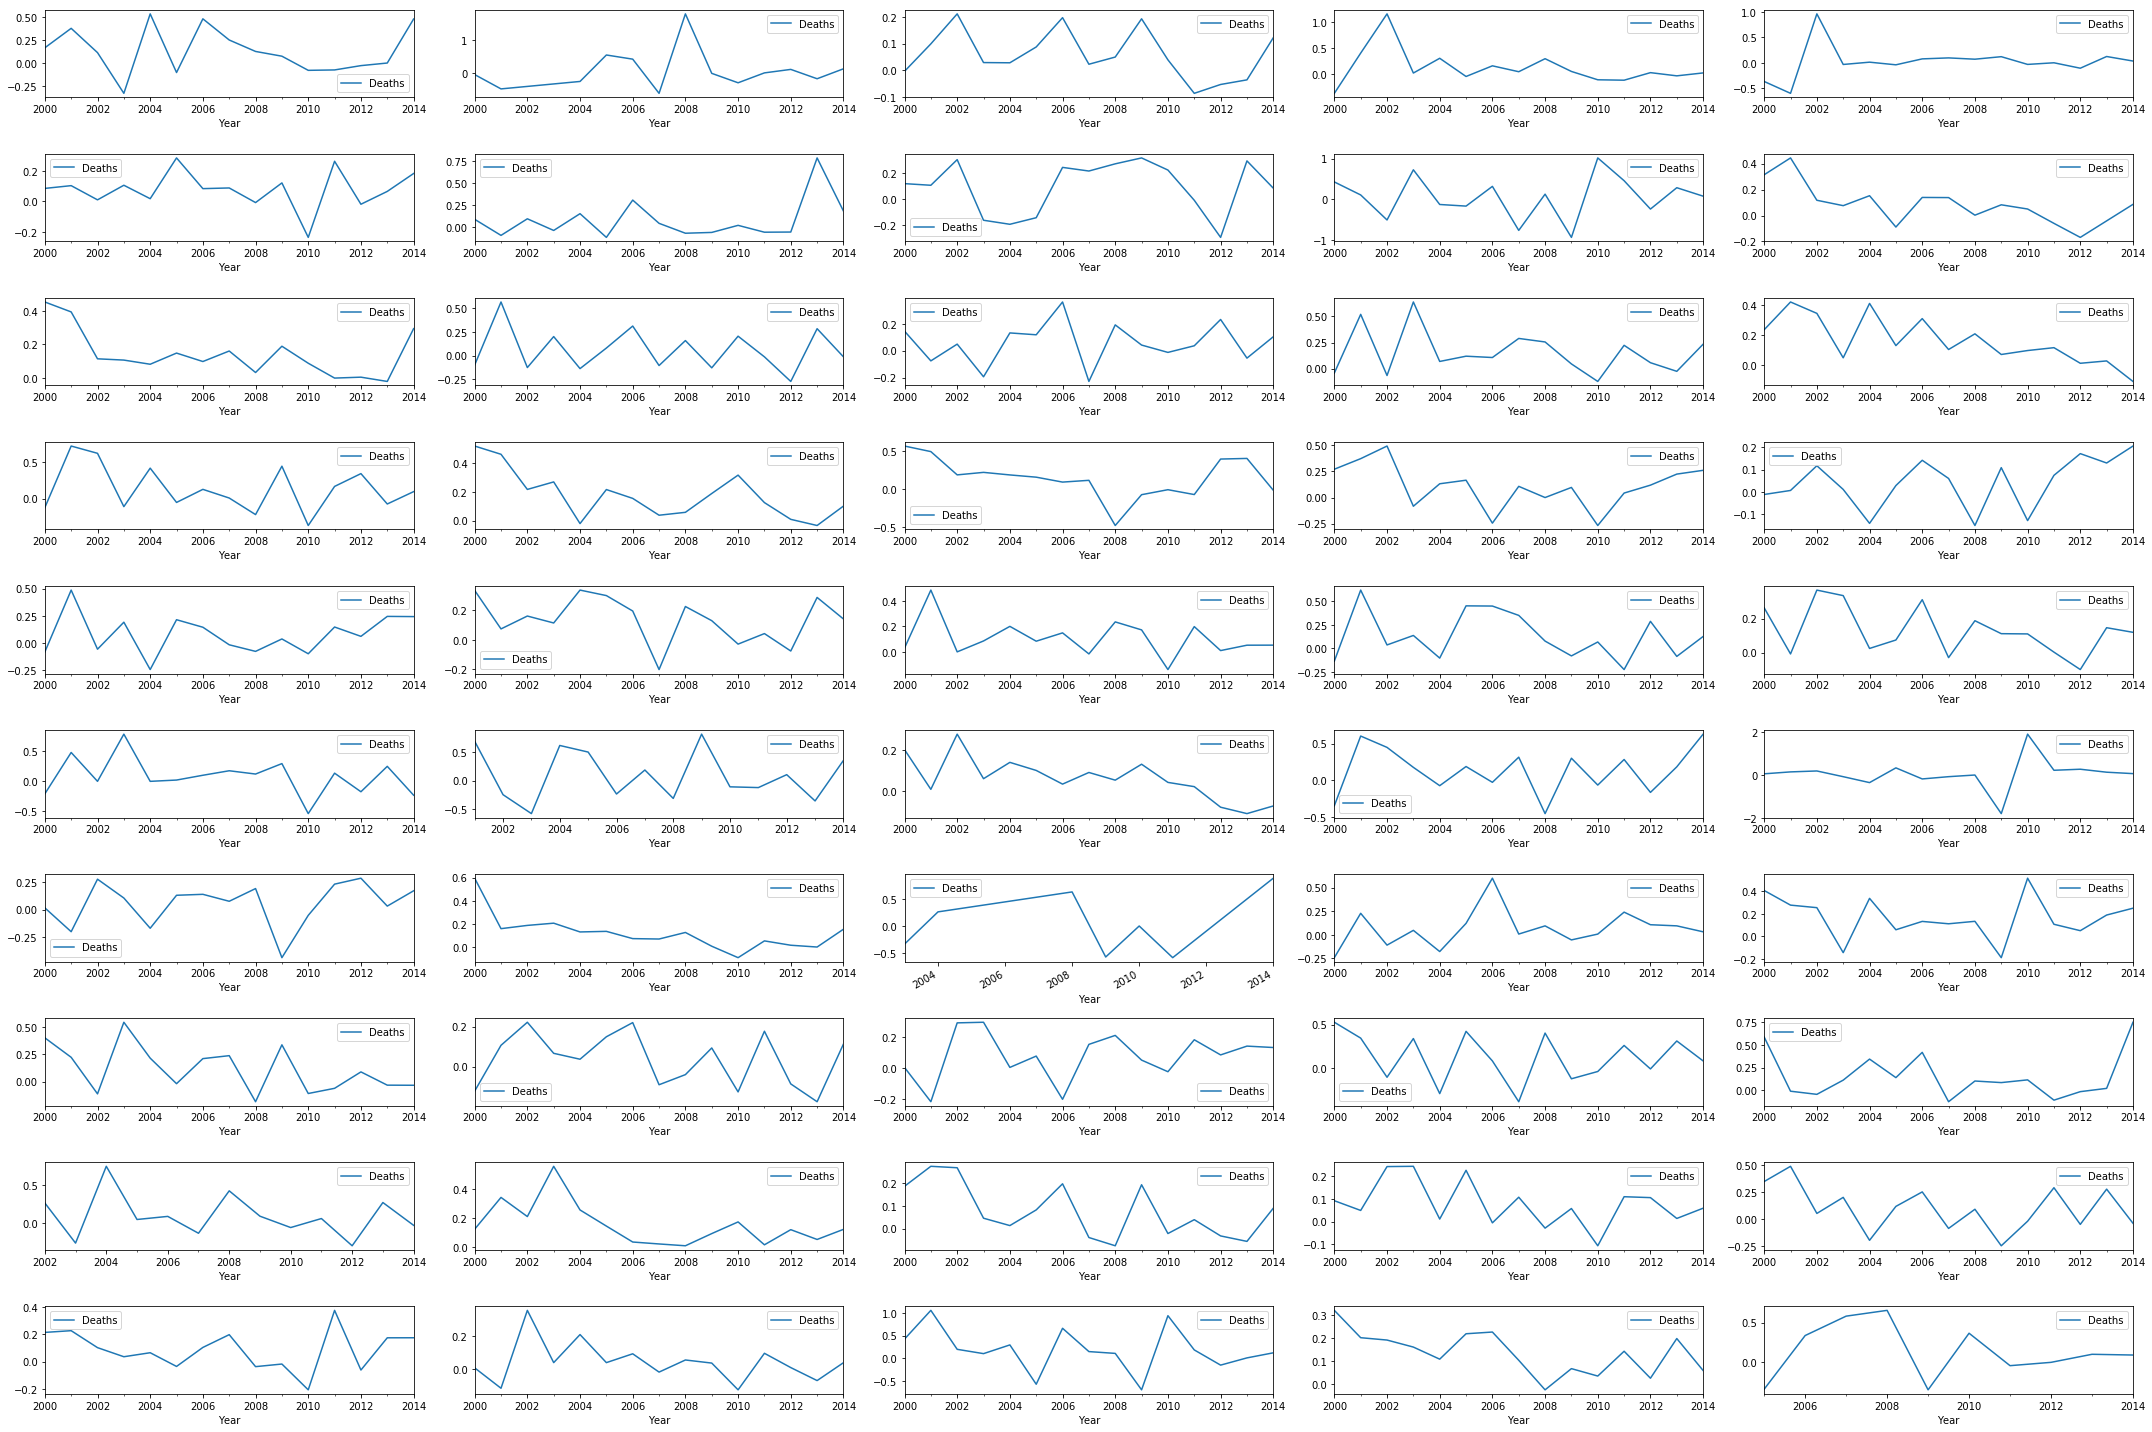

In [147]:
## Stationarity check!
plt.figure(figsize=(30,20), facecolor='white')
plot_number = 1
for i in new_list:
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(10, 5, plot_number)
    i.plot(x='Year', y='Deaths', ax=ax)
#     ax.set_title(i)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

In [124]:
def dickey_fuller3(list_of_dfs):
    for i in list_of_dfs:
        X = i['Deaths'].values
        result = adfuller(X)
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

In [125]:
dickey_fuller3(new_list)

ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: -0.953527
p-value: 0.769835
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901
ADF Statistic: 0.000000
p-valu

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


ValueError: maxlag should be < nobs

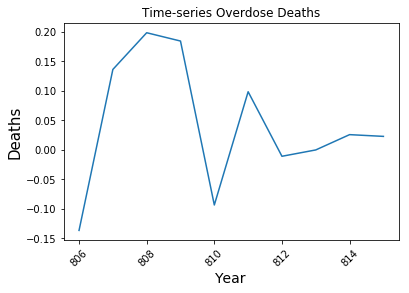

In [133]:
f, ax = plt.subplots(1,1)
ax.plot(df_Wyoming['Deaths'])

# Add title
ax.set_title('Time-series Overdose Deaths')

# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 45)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Deaths', fontsize = 15)

# Show graph
plt.show()
plt.close()

In [126]:
def plot_acf_pacf(df, ts):
  """
  Plot auto-correlation function (ACF) and partial auto-correlation (PACF) plots
  """
  f, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5)) 

  #Plot ACF: 

  ax1.plot(lag_acf)
  ax1.axhline(y=0,linestyle='--',color='gray')
  ax1.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.set_title('Autocorrelation Function for %s' %(ts))

  #Plot PACF:
  ax2.plot(lag_pacf)
  ax2.axhline(y=0,linestyle='--',color='gray')
  ax2.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.set_title('Partial Autocorrelation Function for %s' %(ts))
  
  plt.tight_layout()
  plt.show()
  plt.close()
  
  return

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


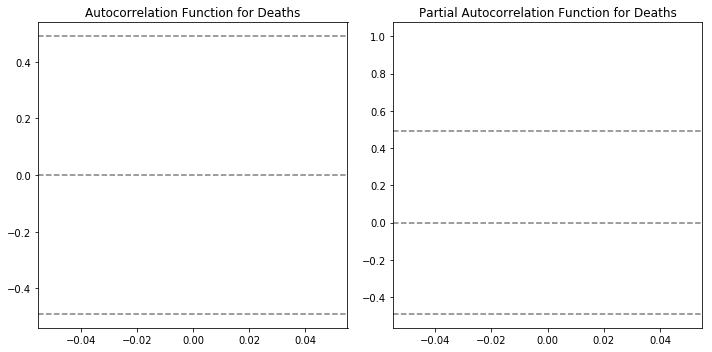

In [127]:
# ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

# determine ACF and PACF
lag_acf = acf(np.array(df_Alabama['Deaths']), nlags = 20)
lag_pacf = pacf(np.array(df_Alabama['Deaths']), nlags = 20)

# plot ACF and PACF
plot_acf_pacf(df = df_Alabama, ts = 'Deaths')

In [249]:
def run_arima_model(df, ts, p, d, q):
    model = ARIMA(df[ts], order=(p, d, q))  
    results_ = model.fit(disp=-1)  

      # get lengths correct to calculate RSS
    len_results = len(results_.fittedvalues)
    ts_modified = df[ts][-len_results:]

      # calculate root mean square error (RMSE) and residual sum of squares (RSS)
    rss = sum((results_.fittedvalues - ts_modified)**2)
    rmse = np.sqrt(rss / len(df[ts]))

      # plot fit
    plt.plot(df[ts])
    plt.plot(results_.fittedvalues, color = 'red')
    plt.title('For ARIMA model (%i, %i, %i) for ts %s, RSS: %.4f, RMSE: %.4f' %(p, d, q, ts, rss, rmse))

    plt.show()
    plt.close()

    return results_

In [250]:
model_AR = run_arima_model(df = df_Alabama, 
                           ts = 'Deaths', 
                           p = 1, 
                           d = 0, 
                           q = 0)

# # MA model with 1st order differencing - ARIMA (0,0,1)
# model_MA = run_arima_model(df = df_example_transform, 
#                            ts = 'ts_log_diff', 
#                            p = 0, 
#                            d = 0, 
#                            q = 1)

# # ARMA model with 1st order differencing - ARIMA (1,0,1)
# model_MA = run_arima_model(df = df_example_transform, 
#                            ts = 'ts_log_diff', 
#                            p = 1, 
#                            d = 0, 
#                            q = 1)

LinAlgError: Array must not contain infs or NaNs